# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [2]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

C:\Users\User\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

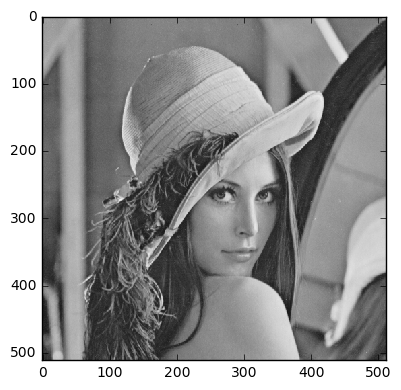

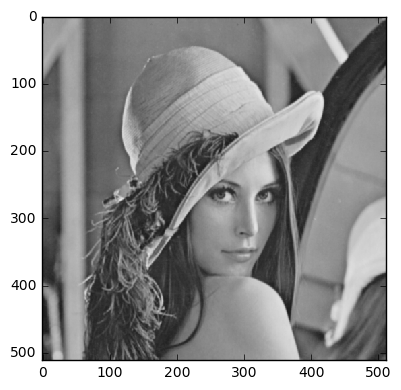

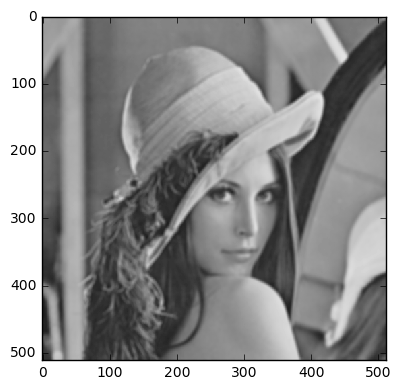

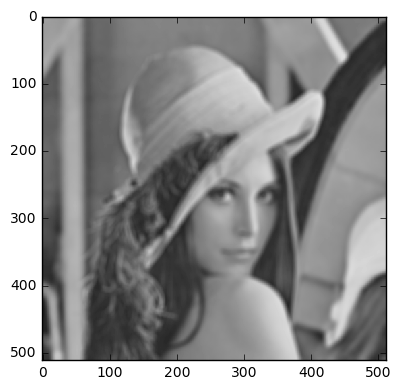

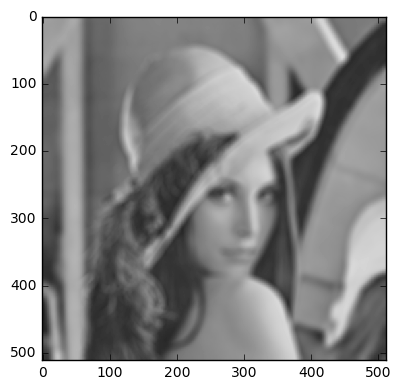

In [3]:
    io.imshow(lena_im)
    
    
from skimage.morphology import disk
from skimage.filters.rank import mean
plt.figure()
avg1 = mean(lena_im, disk(1))
io.imshow(avg1)
plt.figure()
avg3 = mean(lena_im, disk(3))
io.imshow(avg3)
plt.figure()
avg5 = mean(lena_im, disk(5))
io.imshow(avg5)
plt.figure()
avg7 = mean(lena_im, disk(7))
io.imshow(avg7)


disk(7)


### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


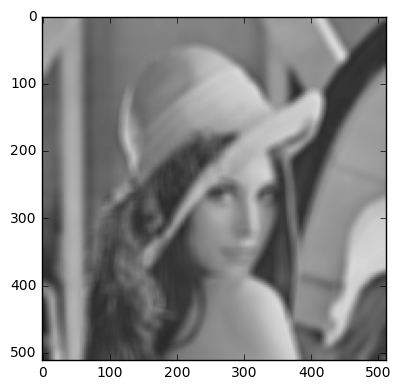

In [4]:
from scipy import ndimage


mask7 = np.array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]).astype('float');

print(mask7)
mask7 = mask7/sum(mask7); #appears in green

mask8 = np.ones((14,14)).astype('float')
mask8 = mask8/np.sum(mask8)


mean8 = ndimage.convolve(lena_im, mask8);
io.imshow(mean8)




Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [5]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

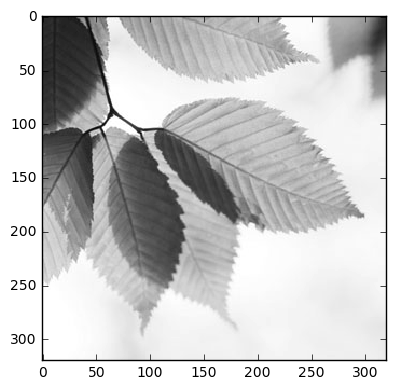

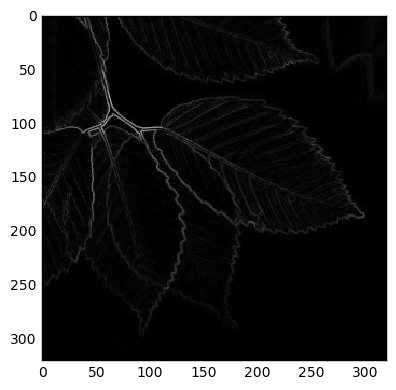

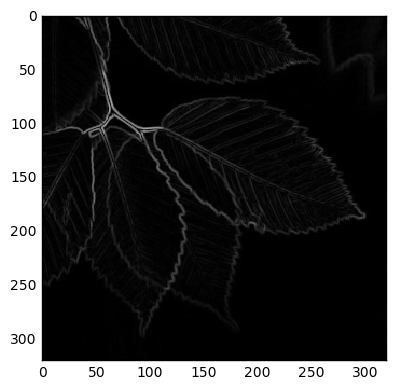

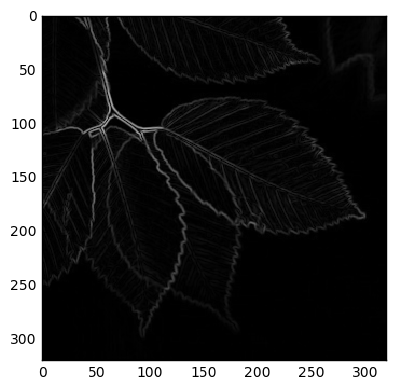

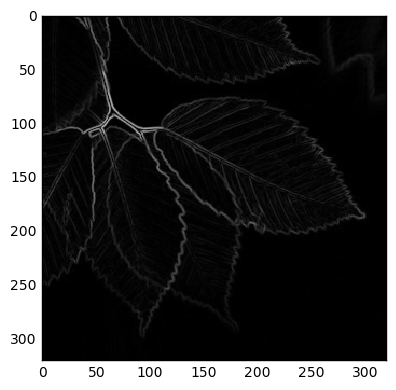

In [6]:


Path = './images/'
leaves_im = io.imread(Path.__add__('leaves.jpg'))
leaves_im = img_as_float(leaves_im)
leaves_im = color.rgb2gray(leaves_im);
plt.figure()
io.imshow(leaves_im)

leaves_im_Robert = filters.roberts(leaves_im)
plt.figure()
io.imshow(leaves_im_Robert)

leaves_im_prewitt = filters.prewitt(leaves_im)
plt.figure()
io.imshow(leaves_im_prewitt)


leaves_im_sobel = filters.sobel(leaves_im)
plt.figure()
io.imshow(leaves_im_sobel)


leaves_im_scharr = filters.scharr(leaves_im)
plt.figure()
io.imshow(leaves_im_scharr)



##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

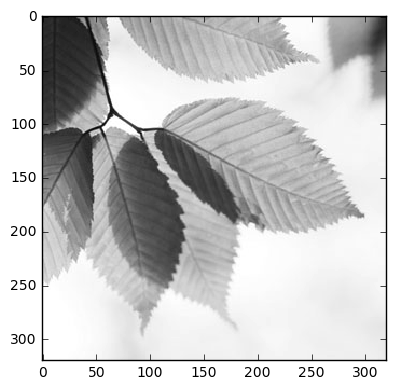

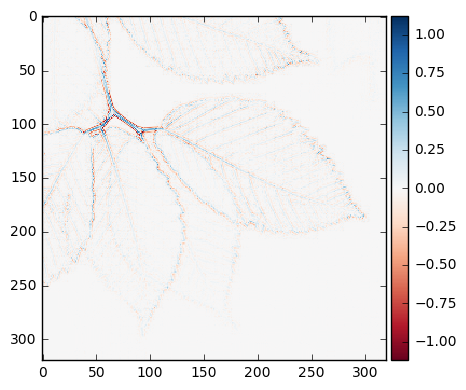

In [7]:
io.imshow(leaves_im)
leaves_im_laplace = ndimage.filters.laplace(leaves_im)
plt.figure()
io.imshow(leaves_im_laplace)


## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [8]:
from skimage import util

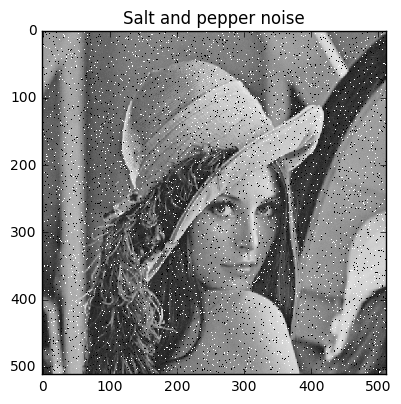

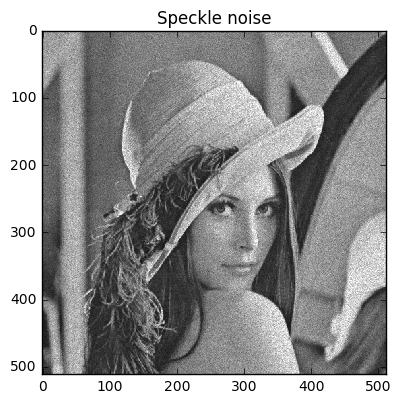

In [9]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

C:\Users\User\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


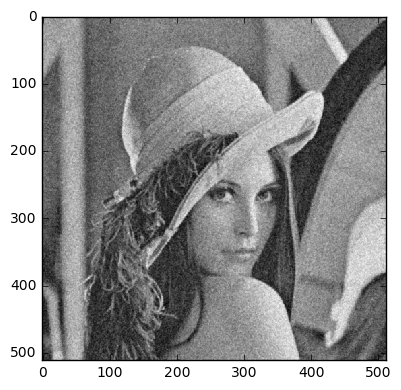

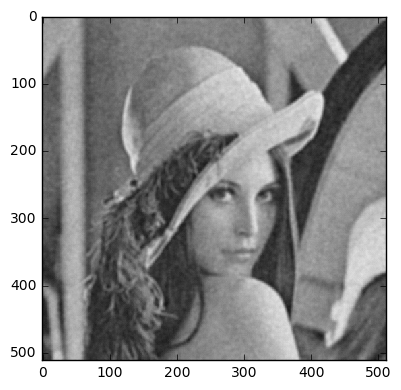

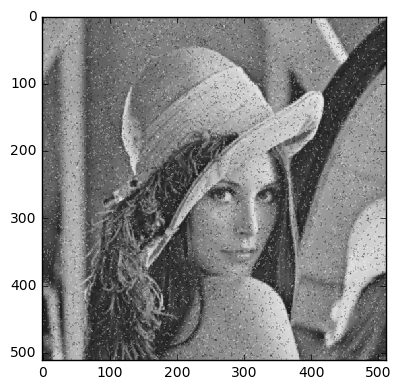

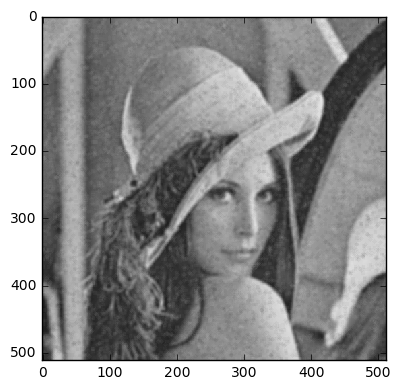

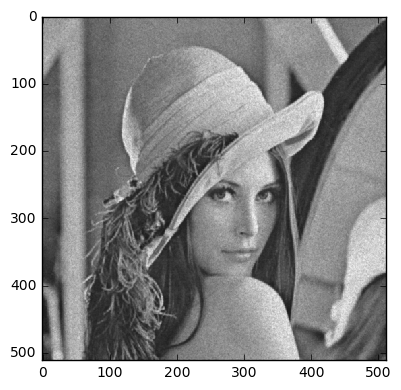

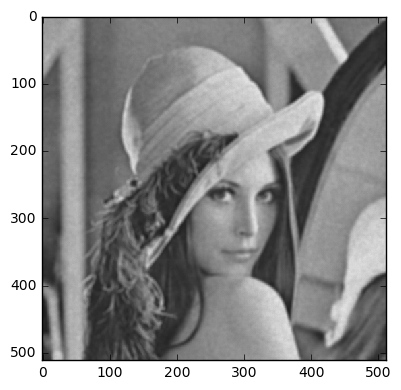

In [10]:
from skimage.filters import rank

plt.figure()
avg1 = mean(lena_gaussian, disk(1))
io.imshow(avg1)
plt.figure()
avg3 =  rank.mean(lena_gaussian, disk(3))
io.imshow(avg3)

plt.figure()
avg1 =  rank.mean(lena_sp, disk(1))
io.imshow(avg1)
plt.figure()
avg3 =  rank.mean(lena_sp, disk(3))
io.imshow(avg3)

plt.figure()
avg1 =  rank.mean(lena_speckle, disk(1))
io.imshow(avg1)
plt.figure()
avg3 =  rank.mean(lena_speckle, disk(3))
io.imshow(avg3)






** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

C:\Users\User\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


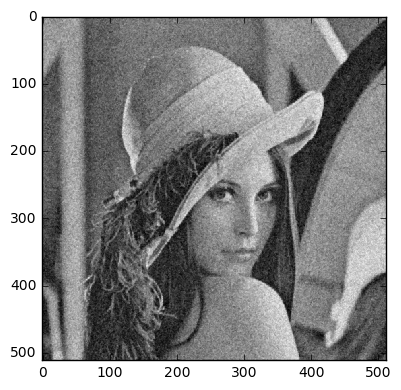

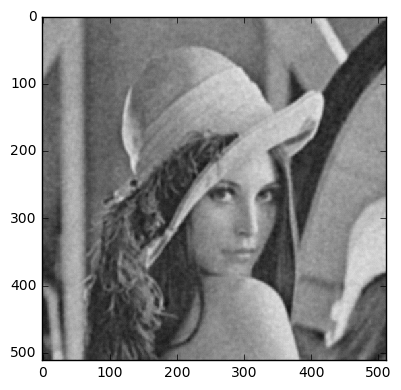

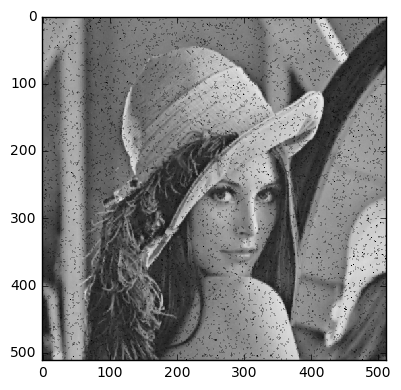

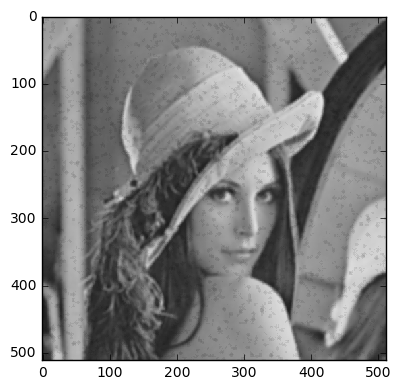

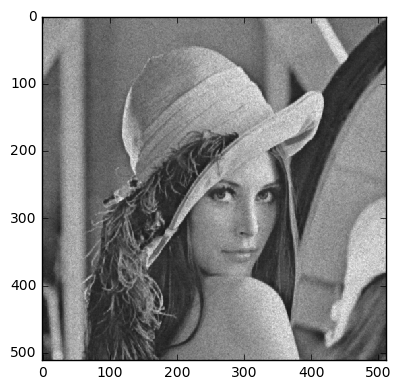

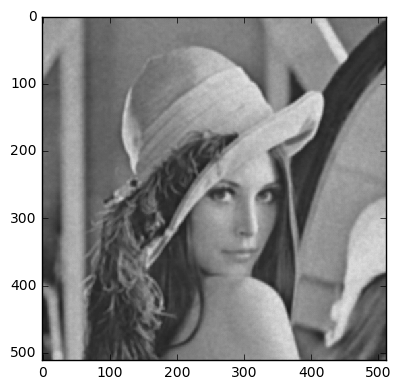

In [11]:


plt.figure()
avg1 = rank.mean_percentile(lena_gaussian, selem = disk(1), p0 = 0.05, p1 = 0.95)
io.imshow(avg1)
plt.figure()
avg3 = rank.mean_percentile(lena_gaussian, selem = disk(3), p0 = 0.05, p1 = 0.95)
io.imshow(avg3)

plt.figure()
avg1 = rank.mean_percentile(lena_sp, selem = disk(1), p0 = 0.05, p1 = 0.95)
io.imshow(avg1)
plt.figure()
avg3 = rank.mean_percentile(lena_sp, selem = disk(3), p0 = 0.05, p1 = 0.95)
io.imshow(avg3)

plt.figure()
avg1 = rank.mean_percentile(lena_speckle, selem = disk(1), p0 = 0.05, p1 = 0.95)
io.imshow(avg1)
plt.figure()
avg3 = rank.mean_percentile(lena_speckle, selem = disk(3), p0 = 0.05, p1 = 0.95)
io.imshow(avg3)



** median filter: **

C:\Users\User\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


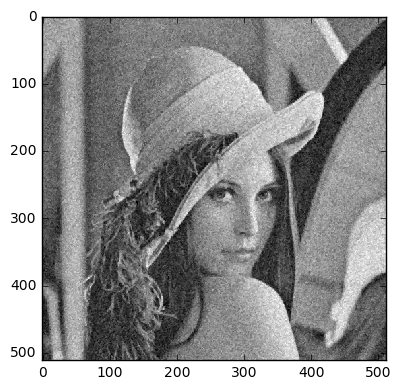

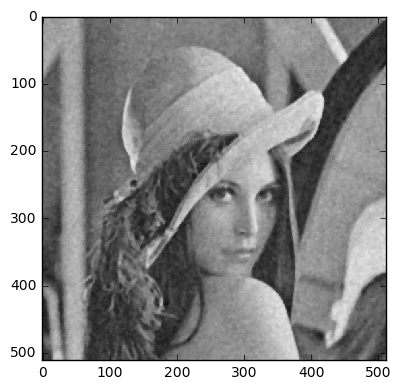

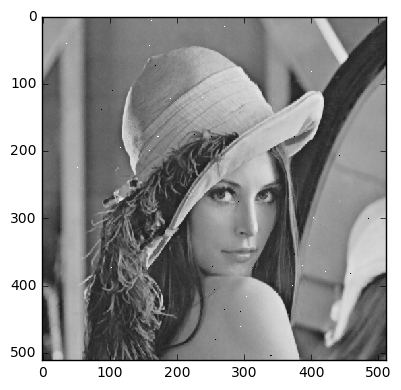

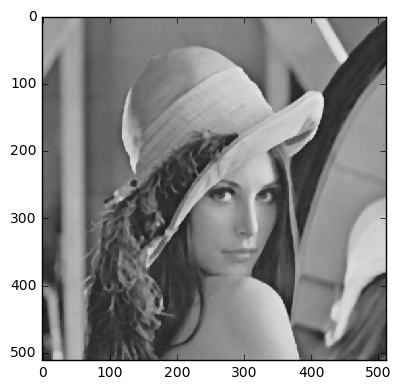

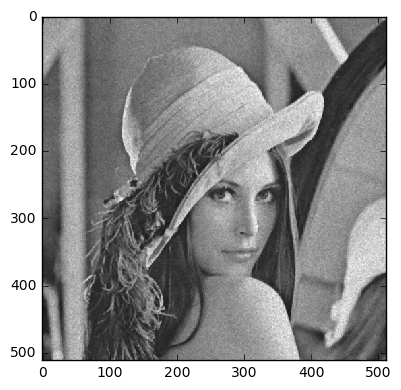

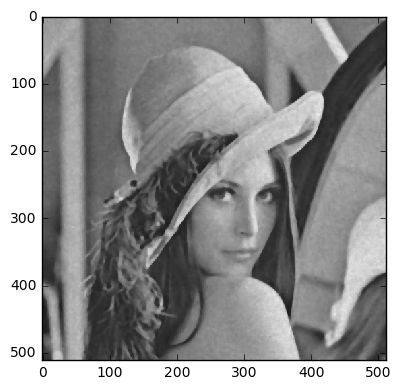

In [12]:

plt.figure()
avg1 = rank.median(lena_gaussian, disk(1))
io.imshow(avg1)
plt.figure()
avg3 = rank.median(lena_gaussian, disk(3))
io.imshow(avg3)

plt.figure()
avg1 = rank.median(lena_sp, disk(1))
io.imshow(avg1)
plt.figure()
avg3 = rank.median(lena_sp, disk(3))
io.imshow(avg3)

plt.figure()
avg1 = rank.median(lena_speckle, disk(1))
io.imshow(avg1)
plt.figure()
avg3 = rank.median(lena_speckle, disk(3))
io.imshow(avg3)



## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

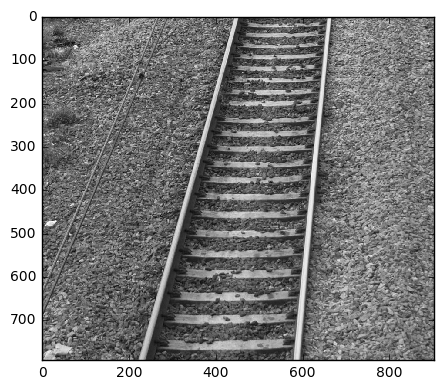

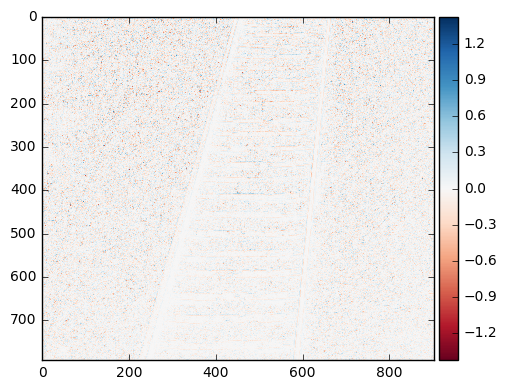

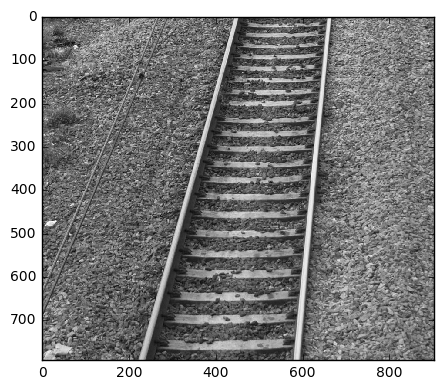

In [13]:
Path = './images/'
railway = io.imread(Path.__add__('railway.jpg'))
railway = img_as_float(railway)
railway = color.rgb2gray(railway);


io.imshow(railway)
railwayL = ndimage.filters.laplace(railway)
plt.figure()
io.imshow(railwayL)

im = railway - railwayL

plt.figure()
io.imshow(railway)

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

In [14]:
from skimage.transform import (hough_line, hough_line_peaks, probabilistic_hough_line)
from skimage import feature
from math import (sin, cos)


def Hough_trans( im ):  
    
    edges = feature.canny( im, sigma=3)
    out, angles, d = hough_line(edges)
    hspace, angles, dists = hough_line_peaks(out, angles, d)
    
    
    from PIL import Image, ImageDraw
    im = Image.new('RGBA', (edges.shape[0], edges.shape[1]), (0, 255, 0, 0)) 
    draw = ImageDraw.Draw(im) 
    
    
    for i in range(0,angles.shape[0]):  
        
        O = angles[i];
        r = dists[i];
        
        
        #droite r = xcos(O) + ysin(O) -> y = (r - xcos(O)) / sin(O)
        #point 1:
    
        x1 = 0;
        y1 = (r - x1 * cos(O)) / sin(O);

    
        #point 2: 
    
        x2 = edges.shape[0] - 1;
        y2 = (r - x2 * cos(O)) / sin(O);
    
    
        draw.line((x1,y1, x2,y2), fill=128)
    im.show()
    return 



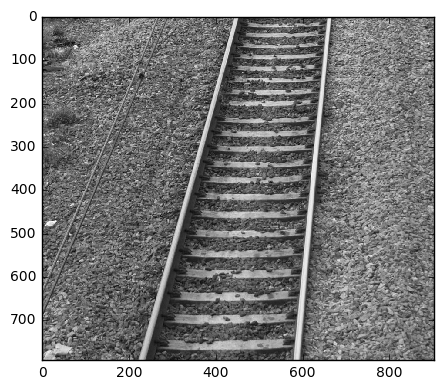

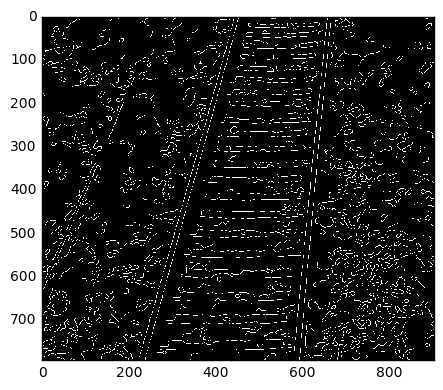

In [15]:



Path = './images/'
railway = io.imread(Path.__add__('railway.jpg'))
railway = img_as_float(railway)
railway = color.rgb2gray(railway);




plt.figure()
io.imshow(railway)

plt.figure()
io.imshow( feature.canny(railway, sigma=3))


Hough_trans(railway)

Hough_trans(lena_im)

Hough_trans(leaves_im)



# hough transform: for each pixels in the coordinates x, y, there is an infinte number of lines 
# that pass though them, of equatoin: y = ax + b. 
# In the coordinates a, b, all the infinite lines that pass though one point in the x,y coordinates
# are represented by one line. 
# We draw all the lines correponding to each pixel in the a,b coordinates. 
# In each intersection of lines, the number of lines which intersects are the number of points aligned. 
# hough_line function give for each intersection, the value of a, b and the number of lines 
# who are intersected. But because a vertical line can't be represented in the a,b coordinates, 
# we use polar coordinates: r = xcos(O) + ysin(O).  
# out, angles, d = hough_line(edges) ->  out: number of lines who are intersected
#                                        angles: O
#                                        d: r



# hough_line function takes all pixels to perform the hough transformation, 
# but probabilistic_hough_line function doesn't take all the pixels to perform the transformation. 
# We can get a good result with 10 to 20 percent of all the pixels.
# Advantages: time of execution shorter. 

